# Project Team 1: Caroline Liongosari, Yueqi Su, Daniel Zhang 
## Determining Factual and Non-Factual News Articles 

### Overview and Motivation: 
Provide an overview of the project goals and motivation for it. Consider that this will be read by people who did not see your project proposal.

In the past several years, people all around the world have realized that fake news can daramatically affect society whether that may be through poltiical issue or business decisions. Due to this, people are becoming more skeptical of information that they read online. One way they address this is by filtuering out news articles that are biased towards or against a particular issue. In order words, they filter out non-factual news articles. 

The goal of this project is to streamline this process by  creating a GUI that would be able to classify news article text as factual or non-factual. In order to do this, we would be implementing a classification machine learning algorithm. 

We decided to test two different classifiers: Naive Bayes and Logistic Regression. We compared the accuracy of the two classifiers and found that Logisitic Regression was more accurate than Logistic Regression for our sample data, so we implemented it in our GUI. 

### Data: 

Our project group was able to use a dataset generously given to us by researchers Ishan Sahu and Debapriyo Majumdar from the Indian Statistical Institute Kolkata who did a similar project as ours in 2017. The researchers derived their dataset from the Signal Media One-Million News Articles Dataset. Their cleaned and annotated version of this dataset was provided to us. The dataset consists of 98 news articles in forms of text files and has 3 parts:
*  **Article Text Length**: the number of characters present in the news article
* **Article Text**: the complete text of the news article
* **Unit tags**: the factual, non-factual annotations in the format: 
    * Character position start : Character position end: Annotation
    * example: 502:634:FACTUAL implies that the article text from character position 502 to 634 is fact

In [1]:
#importing all the necessary packages for the project
import glob
import csv
import re
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud 


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#stopWords is the list of stopWords we will use to filter our dataset
#The SnowballStemmer will be used to stem all the remaining words in the dataset 
stopWords = set(stopwords.words('english'))
stemmer =SnowballStemmer('english')

**Format change: ** After importing all the necessary files, we changed the format of the original dataset (which were only txt files) into a csv file with 2 columns: 1 with sentences or phrases and the other with the corresponding tag (FACT or NON_FACTUAL)

In [3]:
# parsedData is a 2-D array with entries: [annotatedString, annotation]
parsedData = []
path = '/home/student/Documents/Project/annotated-news/*.txt'
files = glob.glob(path)

for file in files:
    f = open(file,'r')
    inputString = f.read()
    
    # inputArray: 
    # [0-2] holds ArticleTextLength.
    # [3-5] holds ArticleText.
    # [6-end] holds UnitTags.
    inputArray = inputString.split('\n')
    articleText = inputArray[4]
    unitTag = []
    
    # inputArray[6] = "<UnitTags>"
    # inputArray[7] = start of actual Unit Tags.
    i = 7
    while i<(len(inputArray)-2):
        unitTag.append(inputArray[i])
        i+=1
    
    for indexes in unitTag:
        # temp = [Character position start, Character position end, Annotation]
        temp = indexes.split(':')
        rawText = articleText[int(temp[0]):int(temp[1])-1]
        #newRawText = "u'"+rawText+"'"
        
        processedText = re.sub('\\\\u[a-zA-Z0-9]{4}',"",rawText)
        parsedData.append([processedText, temp[2]])
    
    f.close()
   

The following code below saves the formatted dataset into a .csv called dataset.csv inside a Project folder within Documents (if a Project folder doesn't exist inside folder, please make one now to run this code) 

In [4]:
with open("/home/student/Documents/Project/dataset.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(parsedData)

The dataset csv file is then converted to two dataframes: df and dff (df will contain the data in its original form without any changes to the words while dff contains the words that are filtered to not contain stopwords and the words are stemmed using Snowball Stemmer)

In [5]:
#create dataframe for the sentences and tags; df will be the dataframe without filtering for stopwords
#dff has stopwords taken out and the rest of the words are stemmed 
csv_file = "/home/student/Documents/Project/dataset.csv"
df = pd.read_table(csv_file, sep = ',', names = ['Sentence','Tag'])
dff = pd.read_table(csv_file, sep = ',', names = ['Sentence','Tag'])

#cleaning the words in the dff dataframe
s = pd.Series ([[]], index=df.index)
dff['Sentence'] = dff['Sentence'].str.lower().str.split().mask(dff['Sentence'].isnull(),s)

#take out the stopwords
dff['Sentence'] = dff['Sentence'].apply(lambda x:' '.join([item for item in x if item not in stopWords]))

#stem the remaining words
dff['Sentence'] = dff['Sentence'].str.lower().str.split().mask(dff['Sentence'].isnull(),s)
dff['Sentence'] = dff['Sentence'].apply(lambda x: ' '.join([stemmer.stem(item) for item in x]))

In [6]:
#Show that the dataframes were created successfully
df.head(20)

,Sentence,Tag
0,We feel like it's our time to step up and prov...,NON_FACTUAL
1,"Since bursting onto the scene in 2003, All Tim...",FACTUAL
2,She even integrates Japanese manga cartoon art...,FACTUAL
3,"The song and its artsy, highly metaphoric vide...",NON_FACTUAL
4,Marie insists that she doesn't write songs for...,NON_FACTUAL
5,Ariana Grande faced backlash in July after a v...,FACTUAL
6,"The 22-year-old pop star, who was dressed in a...",NON_FACTUAL
7,"But, you know as human beings, we all say and ...",NON_FACTUAL
8,"But, you know as human beings, we all say and ...",NON_FACTUAL
9,The brunette beauty chose to put her sun-kisse...,NON_FACTUAL


In [7]:
#dff is created successfully with the stopwords taken out and the remaining words stemmed
dff.head(20)

,Sentence,Tag
0,feel like time step prove world sinc futur hea...,NON_FACTUAL
1,"sinc burst onto scene 2003, time low releas si...",FACTUAL
2,even integr japanes manga cartoon art videos; ...,FACTUAL
3,"song artsy, high metaphor video reflect singer...",NON_FACTUAL
4,mari insist write song world experi enjoy.,NON_FACTUAL
5,ariana grand face backlash juli video releas s...,FACTUAL
6,"22-year-old pop star, dress sexi multicolor mi...",NON_FACTUAL
7,"but, know human beings, say thing mean sometim...",NON_FACTUAL
8,"but, know human beings, say thing mean sometim...",NON_FACTUAL
9,brunett beauti chose put sun-kiss leg full dis...,NON_FACTUAL


### Exploratory Analysis

**Question 1:** How many nonfactual and factual sentences are there? 

In [8]:
df.Tag.value_counts()

FACTUAL        197
NON_FACTUAL    160
Name: Tag, dtype: int64

In [9]:
dff.Tag.value_counts()

FACTUAL        197
NON_FACTUAL    160
Name: Tag, dtype: int64

**Answer:** There's 197 factual sentences while there are 160 nonfactual sentences. (The number of sentences are the same for the filtuered and unfiltered datasets)

**Question 2:** Is there a correlation between the word count of a sentence and the setnences being classified as factual or nonfactual? 

In [10]:
# Counting number of tokens in each sentence with stopwords included.
num_of_words = []
for index, row in df.iterrows():
    num_of_words.append(len(row['Sentence'].split()))
df['Word Count'] = num_of_words
df.head(20)

,Sentence,Tag,Word Count
0,We feel like it's our time to step up and prov...,NON_FACTUAL,27
1,"Since bursting onto the scene in 2003, All Tim...",FACTUAL,56
2,She even integrates Japanese manga cartoon art...,FACTUAL,60
3,"The song and its artsy, highly metaphoric vide...",NON_FACTUAL,27
4,Marie insists that she doesn't write songs for...,NON_FACTUAL,17
5,Ariana Grande faced backlash in July after a v...,FACTUAL,20
6,"The 22-year-old pop star, who was dressed in a...",NON_FACTUAL,24
7,"But, you know as human beings, we all say and ...",NON_FACTUAL,112
8,"But, you know as human beings, we all say and ...",NON_FACTUAL,70
9,The brunette beauty chose to put her sun-kisse...,NON_FACTUAL,23


In [11]:
# Counting number of tokens in each sentence without stopwords included.
num_of_wordsf = []
for index, row in dff.iterrows():
    num_of_wordsf.append(len(row['Sentence'].split()))
dff['Word Count'] = num_of_wordsf
dff.head(20)

,Sentence,Tag,Word Count
0,feel like time step prove world sinc futur hea...,NON_FACTUAL,13
1,"sinc burst onto scene 2003, time low releas si...",FACTUAL,38
2,even integr japanes manga cartoon art videos; ...,FACTUAL,40
3,"song artsy, high metaphor video reflect singer...",NON_FACTUAL,15
4,mari insist write song world experi enjoy.,NON_FACTUAL,7
5,ariana grand face backlash juli video releas s...,FACTUAL,13
6,"22-year-old pop star, dress sexi multicolor mi...",NON_FACTUAL,15
7,"but, know human beings, say thing mean sometim...",NON_FACTUAL,66
8,"but, know human beings, say thing mean sometim...",NON_FACTUAL,33
9,brunett beauti chose put sun-kiss leg full dis...,NON_FACTUAL,15


In [12]:
# Creating and sorting separate dataframes for nonfactual vs factual.
gb = df.groupby('Tag')
x1,x2 = [gb.get_group(x) for x in gb.groups]

gbf = dff.groupby('Tag')
xf1,xf2 = [gbf.get_group(x) for x in gbf.groups]


In [13]:
# Nonfactual word count with stopwords.
print x1.sort_values('Word Count', ascending = False).head(10)
# Factual word count with stopwords.
print x2.sort_values('Word Count', ascending = False).head(10)

                                              Sentence          Tag  \
290  Other risks and uncertainties include the Comp...  NON_FACTUAL   
7    But, you know as human beings, we all say and ...  NON_FACTUAL   
301  According to him, We have a lot of broadband c...  NON_FACTUAL   
8    But, you know as human beings, we all say and ...  NON_FACTUAL   
299  Juwah who strongly believed in foreign investo...  NON_FACTUAL   
264  The Firm Manager product provides the clearest...  NON_FACTUAL   
155  It said Viridor, which operates the Dimmer sit...  NON_FACTUAL   
104  By Liz Raftery,  Who's the Boss? star Danny Pi...  NON_FACTUAL   
139  Nigeria must confront the abduction epidemic s...  NON_FACTUAL   
160  I have walked all the way along the river to m...  NON_FACTUAL   

     Word Count  
290         113  
7           112  
301         101  
8            70  
299          68  
264          57  
155          54  
104          53  
139          48  
160          46  
                    

In [14]:
# Nonfactual word count without stopwords.
print xf1.sort_values('Word Count', ascending = False).head(10)
# Factual word count without stopwords.
print xf2.sort_values('Word Count', ascending = False).head(10)

                                              Sentence          Tag  \
290  risk uncertainti includ compani failur obtain ...  NON_FACTUAL   
7    but, know human beings, say thing mean sometim...  NON_FACTUAL   
301  accord him, lot broadband cabl shore counti ma...  NON_FACTUAL   
299  juwah strong believ foreign investor drive nig...  NON_FACTUAL   
264  firm manag product provid clearest exampl tran...  NON_FACTUAL   
8    but, know human beings, say thing mean sometim...  NON_FACTUAL   
139  nigeria must confront abduct epidem squar abdu...  NON_FACTUAL   
155  said viridor, oper dimmer site, larg compliant...  NON_FACTUAL   
104  liz raftery, who boss? star danni pintauro hiv...  NON_FACTUAL   
306  accord publish gentri foster, vision drone coa...  NON_FACTUAL   

     Word Count  
290          67  
7            66  
301          59  
299          44  
264          37  
8            33  
139          33  
155          31  
104          30  
306          28  
                    

Create histograms for the word counts:

(0, 80)

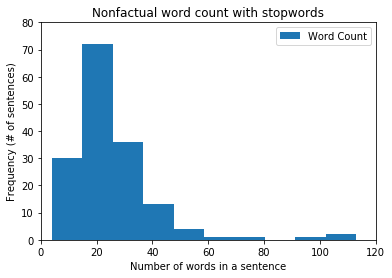

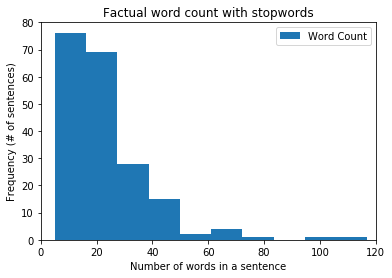

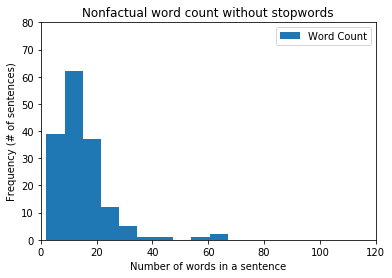

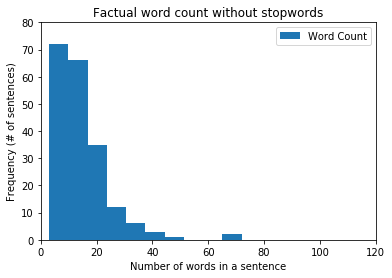

In [15]:
x1_hist = x1.plot.hist()
x1_hist.set_xlabel("Number of words in a sentence")
x1_hist.set_ylabel("Frequency (# of sentences)")
x1_hist.set_title("Nonfactual word count with stopwords")
x1_hist.set_xlim(0,120)
x1_hist.set_ylim(0,80)

x2_hist = x2.plot.hist()
x2_hist.set_xlabel("Number of words in a sentence")
x2_hist.set_ylabel("Frequency (# of sentences)")
x2_hist.set_title("Factual word count with stopwords")
x2_hist.set_xlim(0,120)
x2_hist.set_ylim(0,80)

xf1_hist = xf1.plot.hist()
xf1_hist.set_xlabel("Number of words in a sentence")
xf1_hist.set_ylabel("Frequency (# of sentences)")
xf1_hist.set_title("Nonfactual word count without stopwords")
xf1_hist.set_xlim(0,120)
xf1_hist.set_ylim(0,80)

xf2_hist = xf2.plot.hist()
xf2_hist.set_xlabel("Number of words in a sentence")
xf2_hist.set_ylabel("Frequency (# of sentences)")
xf2_hist.set_title("Factual word count without stopwords")
xf2_hist.set_xlim(0,120)
xf2_hist.set_ylim(0,80)

**Answer: ** There does not seem to be correlation between word count in factual and non-factual setences. This is to be expected, as sentences can have varying lengths regardless of whether they are factual or not.

Next, we map the tags to numerical values: if nonfactual, the tag is 0, 1 if tag is factual. 

In [16]:
#relabel the tags: if non-factual: 0, factual: 1
df['Tag'] = df.Tag.map({'NON_FACTUAL': 0, "FACTUAL": 1})
df.head(5)

,Sentence,Tag,Word Count
0,We feel like it's our time to step up and prov...,0,27
1,"Since bursting onto the scene in 2003, All Tim...",1,56
2,She even integrates Japanese manga cartoon art...,1,60
3,"The song and its artsy, highly metaphoric vide...",0,27
4,Marie insists that she doesn't write songs for...,0,17


In [17]:
dff['Tag'] = dff.Tag.map({'NON_FACTUAL': 0, "FACTUAL": 1})
dff.head(5)

,Sentence,Tag,Word Count
0,feel like time step prove world sinc futur hea...,0,13
1,"sinc burst onto scene 2003, time low releas si...",1,38
2,even integr japanes manga cartoon art videos; ...,1,40
3,"song artsy, high metaphor video reflect singer...",0,15
4,mari insist write song world experi enjoy.,0,7


**Question 3: ** What are the most common words in factual and nonfactual sentences? 

To answer this, we created a cloudword visualizations for each tag (factual and non-factual) to see which are the most common words or stems within our filtered dataframe dff. The bigger the words/stem in the photo, the more common that word was found within that tag. (Cloudwords automatically takes out stopwords, so we won't see anything different if we made cloudwords for the unfiltered dataframe, df).

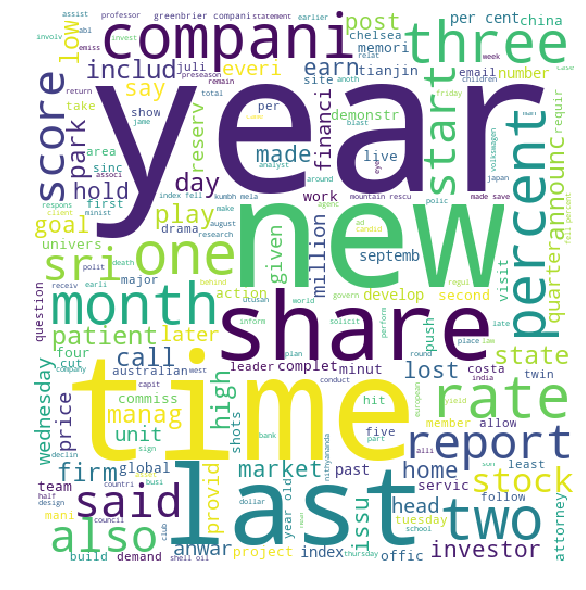

In [18]:
#cloud word for factual sentences
fact_words = ' '.join(list(dff[dff['Tag']== 1]['Sentence']))
fact_wc = WordCloud(background_color= 'white', width = 500, height=512).generate(fact_words)
plt.figure(figsize = (10,8), facecolor = 'white')
plt.imshow(fact_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

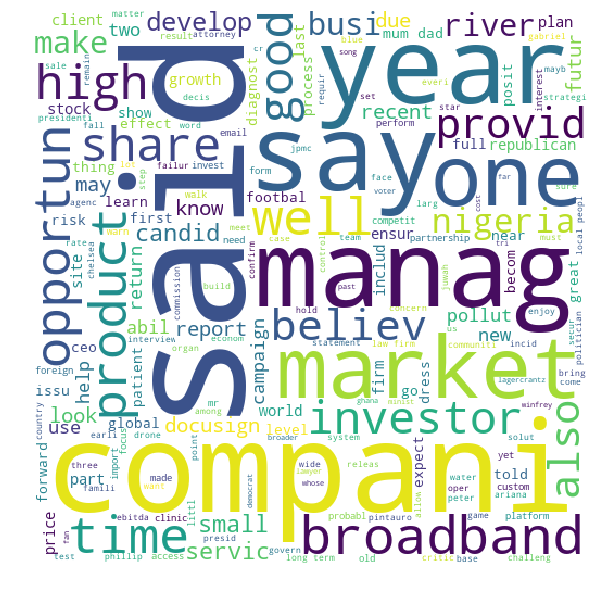

In [19]:
#cloud word for nonfactual sentences
nonfact_words = ' '.join(list(dff[dff['Tag']== 0]['Sentence']))
nonfact_wc = WordCloud(background_color='white',width = 512, height=512).generate(nonfact_words)
plt.figure(figsize = (10,8), facecolor = 'white')
plt.imshow(nonfact_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Answer:** In factual articles, it is more common to find sentences that contain numerical information ( can see numbers like "three", "two", "one". Words related to time such as the words "year", "new", and "time" as well as other business-related words such as "stock", "share", "rate" are also common. This makes sense since business related news that explain stock prices, or time related articles tend to report pure facts. For instance, a news article that contains phrases like "This year, our stock prices have increased 5 percent" is more likely to be purely factual without containing opinions. 

The most common words in nonfactual articles tend to contain words like "said", "say", "market" and "compani". This makes sense since more opinionated articles would have to say words like "said" to say what one's opinion was. A sample sentence could be "He said that this company will not do well in the future." Opnionated papers could also give opinions on how companies and the overall market are doing.  


**Question 4: ** If we split up our dataset into training and test data (such as when we would train our naive bayes and logistic regression classifiers) what would be the most common words in the training data?

In [20]:
#define X and Y for both datasets
X= df.Sentence
y = df.Tag

Xf = dff.Sentence
yf = dff.Tag

In [21]:
#split into training and testing datasets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print X_train.shape
print X_test.shape

Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, random_state=1)
print Xf_train.shape
print Xf_test.shape

(267,)
(90,)
(267,)
(90,)


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Vectorize the data

In [22]:
# instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
vf=CountVectorizer()

In [23]:
# learn training data vocabulary, then create document-term matrix
X_train_data = v.fit_transform(X_train)
X_train_data

Xf_train_data = vf.fit_transform(Xf_train)
Xf_train_data

<267x2054 sparse matrix of type '<type 'numpy.int64'>'
	with 3624 stored elements in Compressed Sparse Row format>

In [24]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_data = v.transform(X_test)
Xf_test_data = vf.transform(Xf_test)

In [25]:
#store token names into the variables Xt_tokens and Xtf_tokens
Xt_tokens =  v.get_feature_names()
Xtf_tokens = vf.get_feature_names()

In [26]:
Xt_tokens = v.get_feature_names()
Xt_count = np.sum(X_train_data.toarray(), axis =0)
print Xt_count

Xtf_tokens = vf.get_feature_names()
Xtf_count = np.sum(Xf_train_data.toarray(), axis=0)
print Xtf_count 

[5 2 1 ... 1 1 1]
[5 2 1 ... 1 1 1]


From the information below we can see that there's 2357 unique words in the unfiltered training dataset while there are 2054 in the filtered one (without stopwords, and stemmed)

In [27]:
#so there's 2357 unique words in the unfiltered training dataset, 2054 in the filtered one 
print Xt_count.shape
print Xtf_count.shape

(2357,)
(2054,)


In [28]:
#show the most common words in the unfiltereddataset 
df_token = pd.DataFrame({'word':Xt_tokens, 'count':Xt_count})
df_token.sort_values(by='count', ascending=False)

,count,word
2112,379,the
177,183,and
2137,172,to
1471,153,of
1105,141,in
1484,78,on
916,67,for
1158,50,is
2281,48,was
2325,45,with


**Answer: ** Unsurprisingly, the most common words in the ulfiltered training dataset are stopwords (the, and, to, of, etc).

The table below shows the most common words in the filtered training dataset so all the stopwords are taken out. The words "said", "year", "compani" are the most common words. This isn't surprising since we've seen that these words are the largest in the Cloudword visuals. 

In [29]:
#stopwords are taken out, so many of the common words are removed
dff_token = pd.DataFrame({'word':Xtf_tokens, 'count':Xtf_count})
dff_token.sort_values(by='count', ascending=False)

,count,word
1621,32,said
2043,26,year
445,25,compani
1673,18,share
1861,17,time
1267,15,new
1088,15,last
926,13,high
1508,13,rate
1171,13,manag


**Question 5:**  Are there a lot of words/tokens in our dataset that only appears in non factual or factual sentences?

In [30]:
# create separate DataFrames for fact and nonfact
non_fact = df[df.Tag==0]
fact = df[df.Tag==1]
non_factf = dff[dff.Tag==0]
factf = dff[dff.Tag==1]

In [31]:
# learn the vocabulary of ALL messages and save it
v.fit(df.Sentence)
v.fit(dff.Sentence)
# put the names of all features (tokens) into a variable
all_tokens = v.get_feature_names()
all_tokensf = v.get_feature_names()

In [32]:
# create document-term matrices for fact and nonfact

fact_doc = v.transform(fact['Sentence'])
nonfact_doc = v.transform(non_fact['Sentence'])

factf_doc = v.transform(factf['Sentence'])
nonfactf_doc = v.transform(non_factf['Sentence'])

In [33]:
# count how many times each token appears across all fact messages

fact_count = np.sum(fact_doc.toarray(), axis=0)

fact_countf = np.sum(factf_doc.toarray(), axis=0)

In [34]:
# count how many times each token appears across all nonfact messages
nonfact_count = np.sum(nonfact_doc.toarray(), axis=0)

nonfact_countf = np.sum(nonfactf_doc.toarray(), axis=0)

In [35]:
#produce list that counts number of times a token appears in a factual or nonfactual sentence (for unfiltered dataframe)
tokens= pd.DataFrame({'token':all_tokens, 'fact': fact_count, 'nonfact': nonfact_count})
tokens

,fact,nonfact,token
0,6,0,00
1,2,0,000
2,1,0,00hrs
3,1,0,03
4,1,0,06
5,1,0,0620
6,1,0,08
7,1,0,0979
8,5,2,10
9,1,0,108


In [36]:
#list for filtered dataframe
tokensf = pd.DataFrame({'token':all_tokensf, 'fact': fact_countf, 'nonfact': nonfact_countf})
tokensf

,fact,nonfact,token
0,6,0,00
1,2,0,000
2,1,0,00hrs
3,1,0,03
4,1,0,06
5,1,0,0620
6,1,0,08
7,1,0,0979
8,5,2,10
9,1,0,108


**Answer:** Yes, there are a lot of tokens that only appear in factual or nonfactual sentences. Interestingly, if the token is numeric like 0,000, 00hrs, the more likely the sentence it is in is factual. Intuitively this makes sense since sentences containing numbers tend to contain factual information like "There were 0 accidents today."

### Final Analysis: 

As part of our final analysis, we want to answer 2 questions: 1) Which is more accurate in determining factual and nonfactual sentences? Naive Bayes or Logistic Regression? 2) Is accuracy affected when the dataset contains stopwords?

We will answer these questions with two methods: 1) Doing one random cross validation on our unfiltered and filtered dataset and analyzing the confusion matrices of the results. 2) Doing cross validation multiple times and calculating the average of the accuracy results. 


**Method 1 for Naive Bayes:**

In [37]:
# train a Naive Bayes model using X_train_data and Xf_train_data
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayesf = MultinomialNB()

naive_bayes.fit(X_train_data, y_train)
naive_bayesf.fit(Xf_train_data, yf_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
# make class predictions 
y_pred_class = naive_bayes.predict(X_test_data)
yf_pred_class = naive_bayesf.predict(Xf_test_data)

In [39]:
# calculate accuracy of class predictions from the one-time cross validation
# compute the accuracy scores
from sklearn import metrics
NB_with_stopwords = metrics.accuracy_score(y_test, y_pred_class)
NB_without_stopwords = metrics.accuracy_score(yf_test, yf_pred_class)
print NB_with_stopwords
print NB_without_stopwords

0.6777777777777778
0.7


**Result:** With the one-time cross validation, taking out the stopwords make Naive Bayes slightly more accurate. (0.6777 vs 0.7)

**Naive Bayes for Method 2:** 

In [40]:
#cross validation multiple times 
from sklearn.model_selection import cross_val_score
from sklearn import svm

# Cross Validation for NB with stopwords.
y_pred_class_reshaped = y_pred_class.reshape(-1,1)
y_test_reshaped = y_test.reshape(-1,1)
NB_scores = cross_val_score(naive_bayes, y_test_reshaped, y_pred_class_reshaped, cv = 5)
print NB_scores
total_NB = 0
for i in NB_scores:
    total_NB += i
total_NB /= len(NB_scores)
print total_NB

# Cross Validation for NB without stopwords.
yf_pred_class_reshaped = yf_pred_class.reshape(-1,1)
yf_test_reshaped = yf_test.reshape(-1,1)
NB_scoresf = cross_val_score(naive_bayes, yf_test_reshaped, yf_pred_class_reshaped, cv = 5)
print NB_scoresf
total_NBF = 0
for i in NB_scoresf:
    total_NBF += i
total_NBF /= len(NB_scores)
print total_NBF

[0.52631579 0.52631579 0.5        0.52941176 0.52941176]
0.5222910216718266
[0.52631579 0.55555556 0.55555556 0.55555556 0.52941176]
0.5444788441692466


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


**Average Accuracy for Naive Bayes with Method 2:** 0.522 when stopwords are kept, 0.544 when they're removed and the remaining words are stemmed

Next we create confusion matrices for both the unfiltered and filtered dataset for **method 1**

In [41]:
# create confusion matrices
matrix =metrics.confusion_matrix(y_test, y_pred_class)
matrixf =metrics.confusion_matrix(yf_test, yf_pred_class)

Text(91.68,0.5,u'predicting labels')

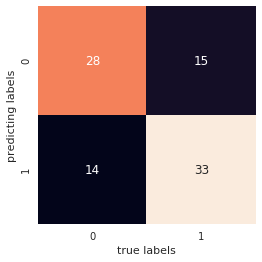

In [42]:
#display confusion matrices
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt 

#confusion matrix for unfiltered dataset
sns.heatmap(matrix.T, square = True, annot=True, fmt='d', cbar=False)
plt.xlabel('true labels')
plt.ylabel('predicting labels')

Text(91.68,0.5,u'predicting labels')

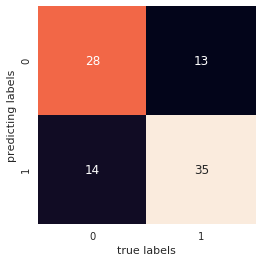

In [43]:
#confusion matrix for filtered dataset 
sns.heatmap(matrixf.T, square = True, annot=True, fmt='d', cbar=False)
plt.xlabel('true labels')
plt.ylabel('predicting labels')

Comparing the two matrices, the only improvement when taking out the stopwords is a few predictions were false negatives were fixed. So, taking out or leaving in stopwords does not affect the performance of Naive Bayes very much.

Let's look at possible reasons as to why we are getting false negatives and positives in the filtered dataset.

In [44]:
# print message text for the false positives
print Xf_test[yf_test < yf_pred_class]

234           two hour waiting, phillip choic call help.
303    desir juwah ensur nigeria get wide rang broadb...
123    creat 25-year-old ceo ben weissenstein, gsgs b...
173    mum dad stock lost gloss, big dividend payer f...
343    near 200 page recommend conclusions, commiss t...
348    indeed, state author lead probe case forc end ...
131    digit revenu expect exceed $500 million first ...
13     data present show patient confirm partial resp...
301    accord him, lot broadband cabl shore counti ma...
27            edison report solicit buy sell securities.
89     india emerg market attract lot fdi without gbi...
112    never thought would see day fantasi book one t...
80     oakland expect sign veteran free agent taylor ...
88     one reason, last ten years, average, fdi niger...
Name: Sentence, dtype: object


Looks like false positive sentences tend to have numbers in them for instance we see "two" in "two hour", 25 in "25-year-old" and "200" in "200 page". The classifier is probably trained to see more numbers as more likely to be factual as we mentioned earlier.

In [45]:
# print message text for the false negatives
print Xf_test[yf_test > yf_pred_class]

333    landauer nordic develop sell product servic ra...
211    like candidate, wolfgang porsche, famili patri...
65      arm around one anoth whole time look total love.
354    part team run preliminari final 2011, miss clu...
163    titanium sponsor dreamforc 2015, docusign show...
119    addit information, contact hazel red 337-826-7...
270    law firm need get inform data firm manag syste...
18     studi continu enrol patient met axl gene alter...
5      ariana grand face backlash juli video releas s...
85     one differ bunker wall twin probabl wont worri...
222    oppenheimerfund oppenheimerfunds, leader globa...
205    180 million chines age 65 enorm opportun priva...
146    earli 2014, announc mountainview walker indust...
Name: Sentence, dtype: object


False negative sentence seem to have more emotion words or words relating to emotion such as "famili", "love", "miss", "worri". The classifier is trained to see emotion-related words as nonfactual. Generally, this makes sense in many cases hence the accuracy rate of the classifier is above 50%. 

Though, this information clearly show the limitation of the bag of words model when classifying sentences. It's important to not only recognize common words in sentences but also realize that the context these words are placed in are important in determining whether a sentence or an article as a whole is factual or not.

Let's try logistic regression for **Method 1**

In [46]:
# import, instantiat, fit data into the model
from sklearn.linear_model import LogisticRegression
# TODO
logreg = LogisticRegression()
logregf = LogisticRegression()
logreg.fit(X_train_data, y_train)
logregf.fit(Xf_train_data, yf_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
# class predictions and predicted probabilities

y_pred_class = logreg.predict(X_test_data)
yf_pred_class = logregf.predict(Xf_test_data)

In [48]:
# calculate accuracy
# TODO
LR_with_stopwords = metrics.accuracy_score(y_test, y_pred_class)
LR_without_stopwords = metrics.accuracy_score(yf_test, yf_pred_class)
print LR_with_stopwords
print LR_without_stopwords

0.6888888888888889
0.6777777777777778


**Results:** With one time cross validation, logistic regression's accuracy is 0.6888 with the stopwords and 0.677 when stopwords are taken out. Interestingly, this means that logistic regression becomes less accurate when the stopwords are taken out and the remaining words are stemmed. 

**Logistic Regression for Method 2**:

In [49]:
# Cross Validation for LR with stopwords.
y_pred_class_reshaped = y_pred_class.reshape(-1,1)
y_test_reshaped = y_test.reshape(-1,1)
LR_scores = cross_val_score(logreg, y_test_reshaped, y_pred_class_reshaped, cv = 5)
print LR_scores
total_LR = 0
for i in LR_scores:
    total_LR += i
total_LR /= len(LR_scores)
print total_LR

#Cross Validation for LR without stopwords.
yf_pred_class_reshaped = yf_pred_class.reshape(-1,1)
yf_test_reshaped = yf_test.reshape(-1,1)
LR_scoresf = cross_val_score(logreg, yf_test_reshaped, yf_pred_class_reshaped, cv = 5)
print LR_scoresf
total_LRF = 0
for i in LR_scoresf:
    total_LRF += i
total_LRF /= len(LR_scores)
print total_LRF

[0.57894737 0.77777778 0.77777778 0.72222222 0.58823529]
0.6889920880632955
[0.63157895 0.66666667 0.66666667 0.61111111 0.64705882]
0.6446164430684554


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


**Results:** The average accuracy of Logistic regression when stopwords are kept is 0.688 and the average accuracy decreases to 0.644 when the stopwords are taken out and the remaining words are stemmed.


Let's create the confusion matrices for **method 1**.

In [50]:
#create the matrices
matrix2 = metrics.confusion_matrix(y_test, y_pred_class)
matrix2f =metrics.confusion_matrix(yf_test, yf_pred_class)


Text(91.68,0.5,u'predicting labels')

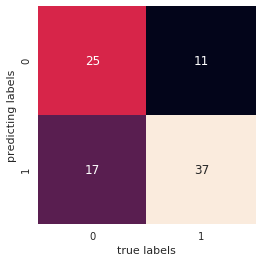

In [51]:
#confusion matrix for unfiltered data
sns.heatmap(matrix2.T, square = True, annot=True, fmt='d', cbar=False)
plt.xlabel('true labels')
plt.ylabel('predicting labels')

Text(91.68,0.5,u'predicting labels')

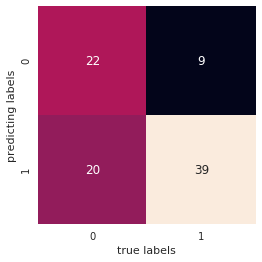

In [52]:
#confusion matrix for filtered data
sns.heatmap(matrix2f.T, square = True, annot=True, fmt='d', cbar=False)
plt.xlabel('true labels')
plt.ylabel('predicting labels')

After taking out the stopwords, there were more false positives and less false negatives. 

Let's look at them more closely:

In [53]:
# print message text for the false positives in unfiltered data
print X_test[y_test < y_pred_class]

234    After two hours of waiting, Phillip had no oth...
165    Companies interested in learning more about Do...
303    All these were the desire of Juwah in ensuring...
123    Created by 25-year-old CEO Ben Weissenstein, G...
111                                   I loved this book.
173    Mums and dads stocks have lost their gloss, wi...
131    Digital revenues are expected to exceed $500 m...
120    This campaign won't be won by politicians lect...
13     Data will be presented showing the patient had...
6      The 22-year-old pop star, who was dressed in a...
73                          "They've kicked out the CEO.
27     Edison's reports are not solicitations to buy ...
89     India is an emerging market and it attracts a ...
12     She will also portraying Molly Peters in the T...
112    I never thought I would see the day when a fan...
106    You don't have to be terrified anymore.  But a...
88     That is one reason, for the last ten years, on...
Name: Sentence, dtype: object


In [54]:
# print message text for the false positives in filtered data
print Xf_test[yf_test < yf_pred_class]

234           two hour waiting, phillip choic call help.
165    compani interest learn docusign salesforc visi...
303    desir juwah ensur nigeria get wide rang broadb...
123    creat 25-year-old ceo ben weissenstein, gsgs b...
173    mum dad stock lost gloss, big dividend payer f...
348    indeed, state author lead probe case forc end ...
131    digit revenu expect exceed $500 million first ...
13     data present show patient confirm partial resp...
6      22-year-old pop star, dress sexi multicolor mi...
139    nigeria must confront abduct epidem squar abdu...
301    accord him, lot broadband cabl shore counti ma...
93     govern lever pull, jpmc actual among five fore...
27            edison report solicit buy sell securities.
89     india emerg market attract lot fdi without gbi...
306    accord publish gentri foster, vision drone coa...
122                          "but reform process, event.
12        also portray molli peter tv seri stuck middle.
112    never thought would see 

In [55]:
# print message text for the false negatives in unfiltered data
print X_test[y_test > y_pred_class]

333    Landauer Nordic develops and sells products an...
211    The most likely candidate, Wolfgang Porsche, f...
270    If a law firm needs to get information or data...
344    Among the issues addressed, the commission cit...
342    An independent commission in the state of Miss...
117    Following the question-and-answer period, the ...
85     One difference between Bunker and Wall and the...
205    There are 180 million Chinese over the age of ...
146    Then in early 2014, it was announced Mountainv...
256    That would require a three-man panel, with Che...
260    More than 500 demonstrations happened througho...
Name: Sentence, dtype: object


In [56]:
# print message text for the false negatives in filtered data
print Xf_test[yf_test > yf_pred_class]

333    landauer nordic develop sell product servic ra...
211    like candidate, wolfgang porsche, famili patri...
354    part team run preliminari final 2011, miss clu...
270    law firm need get inform data firm manag syste...
5      ariana grand face backlash juli video releas s...
85     one differ bunker wall twin probabl wont worri...
222    oppenheimerfund oppenheimerfunds, leader globa...
205    180 million chines age 65 enorm opportun priva...
146    earli 2014, announc mountainview walker indust...
Name: Sentence, dtype: object


Just from looking at this information alone, there's not an obvious indication of why we are getting more false negatives and positives in the filtered data compared to the unfiltered one when performing logistic regression. 

**Summary of Method 1: ** With only one instance of cross validation, Naive Bayes is slightly more accurate than logistic regression when the stopwords are kept in the dataset but logistic regression performs better when the stopwords are taken out. 

Since the method 1 only uses one instance of cross validation the results may not be as trustworthy. We would get a more valid accuracy score if we ran cross validation multiple times and got the average of those accuracy scores instead. Hence, we only create the histogram for the results from **method 2**:

(0.4, 0.7234416924664603)

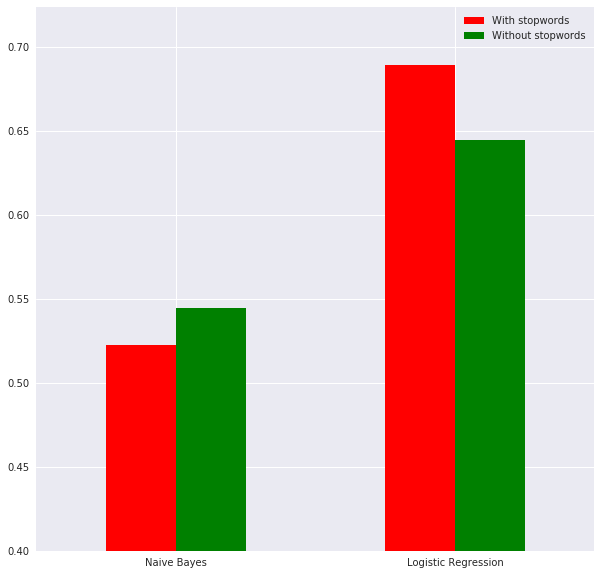

In [57]:
#Histogram of the accuracy results
histogram = pd.DataFrame({'With stopwords':[total_NB, total_LR], 'Without stopwords': [total_NBF, total_LRF]})
                        
graph = histogram.plot(kind="bar",  color = ['r', 'g', 'r','g'], figsize=(10,10))
graph.set_xticklabels(["Naive Bayes", "Logistic Regression"], rotation = 0)
graph.set_ylim(ymin=0.4)



**Result for Method 2:** It turns out that when we did cross validation multiple times that logistic regression actually performs better than naive bayes no matter if we take out the stopwords or not. We think that logistic regression performs better because naive bayes treats each feature (words/tokens) weights independently, meaning that even if some of the features or words are correlated, they're both double-counted in calculating the weight of the words. Words in sentences tend to be correlated as some words go together in certain phrases. On the other hand, logistic regression compensates by treating correlated features as the same, hence for more accurate results.

Though, the accuracy results are not terribly great. Like we said earlier, this is probably due to the limitations of the bag of words model in doing classification problems. However, given how simplistic the bag of words model is, the accuracy result is actually quite impressive as the accuracy results are above 0.5.